In [ ]:
import matplotlib.pyplot as plt
import pyvista as pv
import json
import numpy as np
import os
import subprocess
plt.rcParams.update({'font.size': 8})
import re

if 'REPO_PATH' not in locals():
    os.chdir('../../../')
    REPO_PATH = os.getcwd()

print(REPO_PATH)


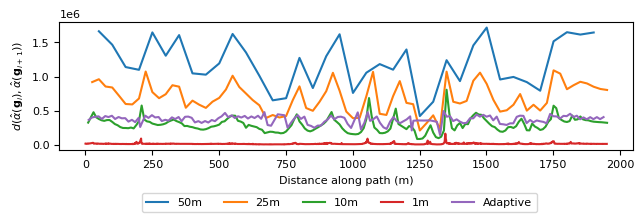

In [4]:
with open('data/environments/3d_dense/metric.json') as f:
    dense = np.array(json.load(f))

with open('data/environments/3d_dense/points.json') as f:
    dense_points = np.array(json.load(f))

with open('data/environments/3d/metric.json') as f:
    sparse = np.array(json.load(f))

with open('data/environments/3d_50/metric.json') as f:
    metric_50 = np.array(json.load(f))
with open('data/environments/3d_25/metric.json') as f:
    metric_25 = np.array(json.load(f))

with open('data/environments/3d_10/metric.json') as f:
    metric_10 = np.array(json.load(f))

with open('data/environments/3d_adaptive/metric.json') as f:
    metric_adptive = np.array(json.load(f))

fig = plt.figure(figsize=(6.5,2))
ax = fig.add_subplot()

t_dense = np.arange(0, len(dense), 1)
t_sparse = np.linspace(0, len(dense), len(sparse))

rx = re.compile(r'\d+')
with open('data/environments/3d_50/points.json') as f:
    p_50 = np.array(json.load(f))
with open('data/environments/3d_25/points.json') as f:
    p_25 = np.array(json.load(f))
with open('data/environments/3d_10/points.json') as f:
    p_10 = np.array(json.load(f))
with open('data/environments/3d_adaptive/points.json') as f:
    p_adaptive = np.array(json.load(f))

t_50 = np.linspace(0, len(dense), len(p_50))
t_25 = np.linspace(0, len(dense), len(p_25))
t_10 = np.linspace(0, len(dense), len(p_10))
c_adaptive = 0
t_adpative = []
for i in range(p_adaptive.shape[0] - 1):
    c = np.linalg.norm(p_adaptive[i] - p_adaptive[i + 1])
    c_adaptive += c
    t_adpative.append(c_adaptive)

# ax.plot(t_sparse, sparse)
ax.plot(t_50[1:len(metric_50) + 1], metric_50)
ax.plot(t_25[1:len(metric_25) + 1], metric_25)
ax.plot(t_10[1:len(metric_10) + 1], metric_10)
ax.plot(t_dense, dense)
ax.plot(t_adpative, metric_adptive)
fig.legend(['50m', '25m', '10m', '1m', 'Adaptive'], loc=8, ncols=5, bbox_to_anchor=(.525, -.1))
ax.set_xlabel('Distance along path (m)')
ax.set_ylabel(r'$d(\hat{\alpha}(\mathbf{g}_i), \hat{\alpha}(\mathbf{g}_{i + 1}))$')
fig.tight_layout()
fig.savefig('notebooks/figures/metric.pdf', bbox_inches='tight')

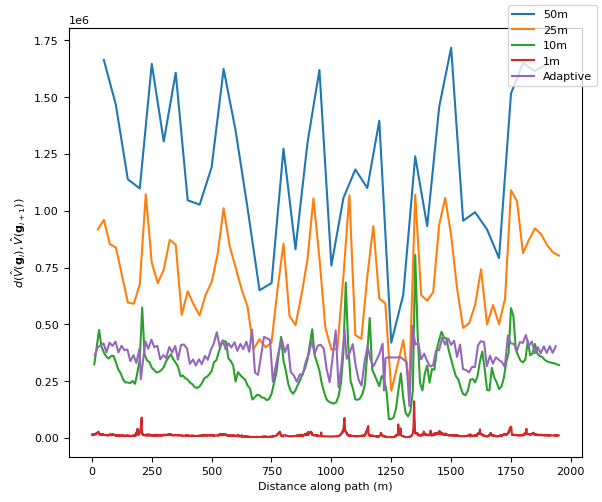

In [13]:
with open('data/environments/3d_dense/metric.json') as f:
    dense = np.array(json.load(f))

with open('data/environments/3d_dense/points.json') as f:
    dense_points = np.array(json.load(f))

with open('data/environments/3d/metric.json') as f:
    sparse = np.array(json.load(f))

with open('data/environments/3d_50/metric.json') as f:
    metric_50 = np.array(json.load(f))
with open('data/environments/3d_25/metric.json') as f:
    metric_25 = np.array(json.load(f))

with open('data/environments/3d_10/metric.json') as f:
    metric_10 = np.array(json.load(f))

with open('data/environments/3d_adaptive/metric.json') as f:
    metric_adptive = np.array(json.load(f))

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot()

t_dense = np.arange(0, len(dense), 1)
t_sparse = np.linspace(0, len(dense), len(sparse))

rx = re.compile(r'\d+')
with open('data/environments/3d_50/points.json') as f:
    p_50 = np.array(json.load(f))
with open('data/environments/3d_25/points.json') as f:
    p_25 = np.array(json.load(f))
with open('data/environments/3d_10/points.json') as f:
    p_10 = np.array(json.load(f))
with open('data/environments/3d_adaptive/points.json') as f:
    p_adaptive = np.array(json.load(f))

t_50 = np.linspace(0, len(dense), len(p_50))
t_25 = np.linspace(0, len(dense), len(p_25))
t_10 = np.linspace(0, len(dense), len(p_10))
c_adaptive = 0
t_adpative = []
for i in range(p_adaptive.shape[0] - 1):
    c = np.linalg.norm(p_adaptive[i] - p_adaptive[i + 1])
    c_adaptive += c
    t_adpative.append(c_adaptive)

# ax.plot(t_sparse, sparse)
ax.plot(t_50[1:len(metric_50) + 1], metric_50)
ax.plot(t_25[1:len(metric_25) + 1], metric_25)
ax.plot(t_10[1:len(metric_10) + 1], metric_10)
ax.plot(t_dense, dense)
ax.plot(t_adpative, metric_adptive)
fig.legend(['50m', '25m', '10m', '1m', 'Adaptive'])
ax.set_xlabel('Distance along path (m)')
ax.set_ylabel(r'$d(\hat{V}(\mathbf{g}_i), \hat{V}(\mathbf{g}_{i + 1}))$')
fig.tight_layout()
fig.savefig('notebooks/figures/metric_slides.pdf', bbox_inches='tight')

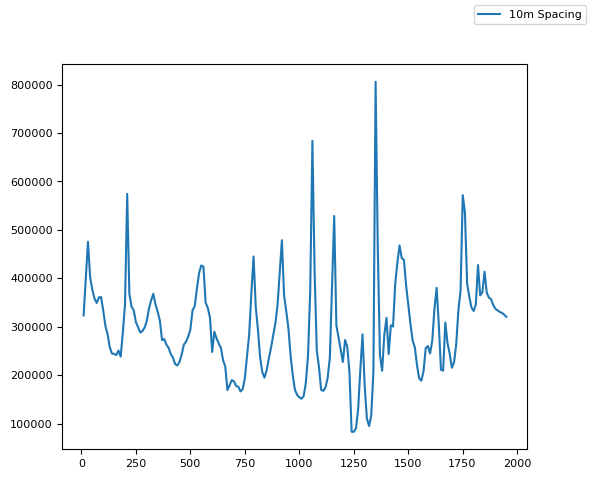

In [10]:
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot()

t_dense = np.arange(0, len(dense), 1)

ax.plot(t_10[1:len(metric_10) + 1], metric_10)
ax.set_xlabel('Distance along path (m)')
ax.set_ylabel(r'$d(\hat{V}(\mathbf{g}_i), \hat{V}(\mathbf{g}_{i + 1}))$')
fig.legend(['10m Spacing'])
fig.savefig('notebooks/figures/10m_metric.pdf')